In [5]:
#Data Importation from Github repo
import pandas as pd
cat_df=pd.read_json("https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/categories.json")
cat2=cat_df.copy()
products=pd.read_json("https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json")

In [6]:
#Visualizing paths to the category to find the best way of cleaning it 
path=cat2.loc[1011]['path']
id=cat2.loc[1011]['id']
name=cat2.loc[1011]['name']
print(path)
print(id)
print(name)

[{'id': 'pcmcat128500050004', 'name': 'Name Brands'}, {'id': 'pcmcat318300050003', 'name': 'KitchenAid'}, {'id': 'pcmcat143000050041', 'name': 'KitchenAid Ranges, Cooktops & Ovens'}, {'id': 'pcmcat143000050042', 'name': 'KitchenAid Ranges'}]
pcmcat143000050042
KitchenAid Ranges


In [7]:
#Found some good aproach
list(path[-1].values())[1]

'KitchenAid Ranges'

In [8]:
products['category'][5]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'},
 {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]

In [9]:
#Creating list for categories name and id
category_name=[]
category_id=[]
for x in products['category']:
    a=list(x[-1].values())[0]
    b=list(x[-1].values())[1]
    category_id.append(a)
    category_name.append(b)
    

In [10]:
#Asigning it to columns in the dataframe
products['category_id']=category_id
products['category_name']=category_name

In [11]:
#Adding the column cat_list to dataframe to see a cleaner list of categories
cat_list=[]
for product in products['category']:
    sub_list=[]
    for y in product:
        label=list(y.values())[1]
        sub_list.append(label)
    cat_list.append(sub_list)
cat_list[:10]

products['cat_list']=cat_list

In [12]:
products[:10]

,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image,category_id,category_name,cat_list
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,41333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,41333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,41333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,39800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,41333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
5,185267,Duracell - D Batteries (4-Pack),HardGood,9.99,41333430010,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.99,Compatible with select electronic devices; D s...,Duracell,MN1300R4Z,http://www.bestbuy.com/site/duracell-d-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
6,312290,Duracell - 9V Batteries (2-Pack),HardGood,7.99,41333216010,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; alk...,Duracell,MN1604B2Z,http://www.bestbuy.com/site/duracell-9v-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208002,Alkaline Batteries,"[Connected Home & Housewares, Housewares, Hous..."
7,324884,Directed Electronics - Viper Audio Glass Break...,HardGood,39.99,93207005060,"[{'id': 'pcmcat113100050015', 'name': 'Carfi I...",0,From our expanded online assortment; compatibl...,Directed Electronics,506T,http://www.bestbuy.com/site/directed-electroni...,http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat113100050015,Carfi Instore Only,[Carfi Instore Only]
8,333179,Energizer - N Cell E90 Batteries (2-Pack),HardGood,5.99,39800013200,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Alkaline batteries; 1.5V,Energizer,E90BP-2,http://www.bestbuy.com/site/energizer-n-cell-e...,http://img.bbystatic.com/BestBuy_US/images/pro...,abcat0208006,Specialty Batteries,"[Connected Home & Housewares, Housewares, Hous..."
9,346575,Metra - Radio Installation Dash Kit for Most 1...,HardGood,16.99,86429002757,"[{'id': 'abcat0300000', 'name': 'Car Electroni...",0,From our expanded online assortment; compatibl...,Metra,99-5512,http://www.bestbuy.com/site/metra-radio-instal...,http://img.bbystatic.com/BestBuy_US/images/pro...,pcmcat165900050033,Dash Installation Kits,"[Car Electronics & GPS, Car Installation Parts..."


In [13]:
#Visualizing the most popular categories
pd.set_option('display.max_rows', None)
pd.value_counts(category_name)

Pre-Owned Games                                 3556
Cell Phone Cases & Clips                        1845
iPhone Cases & Clips                            1471
Dash Installation Kits                           739
All Refrigerators                                689
Bluetooth & Wireless Speakers                    670
Sheet Music                                      621
Cases, Covers & Keyboard Folios                  508
Cookware                                         486
Printer Ink                                      476
Laptop Bags & Cases                              432
All TV Stands                                    409
Earbud & In-Ear Headphones                       400
Best Buy Gift Cards                              388
All Desktops                                     350
Food Preparation Utensils                        346
Portable Chargers/Power Packs                    344
PC Laptops                                       343
USB Flash Drives                              

In [14]:
#Getting a string from each value of cat_list
str_cat=[]
for product in products['cat_list']:
    jkl=str()
    for x in product:
        jkl=jkl+x+' '
    str_cat.append(jkl)
#str_cat[1200:1250]
products['string_cat']=str_cat

In [15]:
products.columns

Index(['sku', 'name', 'type', 'price', 'upc', 'category', 'shipping',
       'description', 'manufacturer', 'model', 'url', 'image', 'category_id',
       'category_name', 'cat_list', 'string_cat'],
      dtype='object')

In [16]:
#Dropping unnecesary columns
products_clean=products.drop(columns=['sku','upc','type','price', 'shipping', 'manufacturer', 'model', 'url', 'image'])

In [17]:

number_products=len(products)
number_categories=products_clean['category_name'].unique()
category_distribution=products_clean['category_name'].value_counts()

In [18]:
!pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\frodr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Price Distribution

C:\Users\frodr\AppData\Local\Temp\ipykernel_39368\566958153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(products['price'])


<AxesSubplot:xlabel='price', ylabel='Density'>

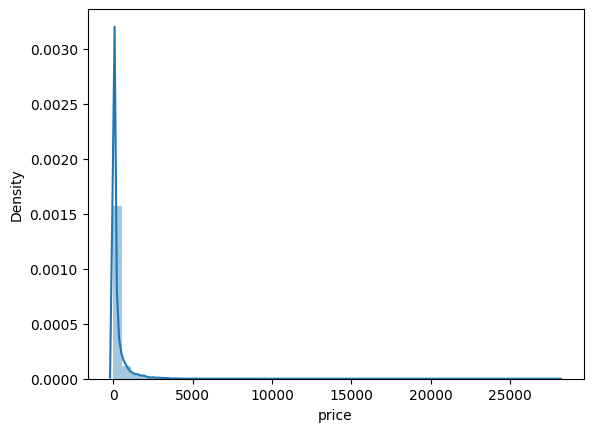

In [19]:
import seaborn as sns
sns.distplot(products['price'])

Shipping Distribution

C:\Users\frodr\AppData\Local\Temp\ipykernel_39368\1284429329.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(products['shipping'].replace('',0))


<AxesSubplot:xlabel='shipping', ylabel='Density'>

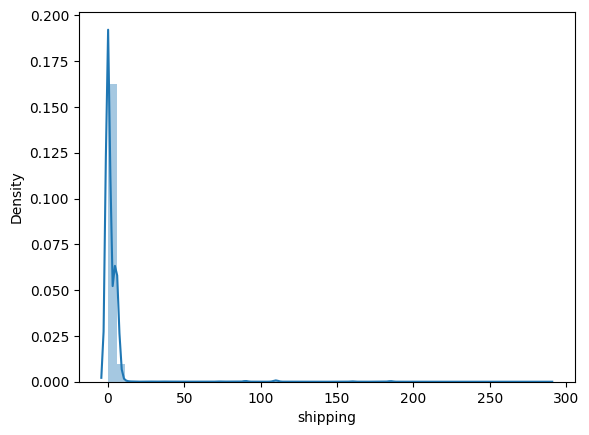

In [20]:
sns.distplot(products['shipping'].replace('',0))

In [21]:
#Calculating the threshold to set to get the 80% of the data without including all the categories
goal=len(products)*0.8
indexes=products['category_name'].value_counts().index
values=products['category_name'].value_counts().values

sum_values=[]
categories_inside=[]
for x,y in zip(indexes,values):
    if sum(sum_values)<goal:
        sum_values.append(y)
        categories_inside.append(x)
print(sum_values)
print(len(categories_inside))

[3556, 1845, 1471, 739, 689, 670, 621, 508, 486, 476, 432, 409, 400, 388, 350, 346, 344, 343, 320, 305, 303, 295, 284, 276, 264, 263, 261, 257, 254, 237, 235, 233, 229, 227, 215, 214, 211, 210, 197, 194, 193, 193, 191, 187, 186, 186, 185, 179, 175, 174, 171, 167, 165, 163, 163, 163, 157, 153, 153, 152, 150, 147, 145, 141, 140, 135, 132, 132, 131, 130, 126, 125, 123, 121, 121, 120, 120, 119, 118, 117, 117, 115, 115, 115, 114, 114, 113, 112, 112, 111, 109, 107, 106, 106, 105, 104, 104, 104, 103, 102, 102, 99, 98, 98, 97, 96, 96, 94, 93, 92, 91, 89, 89, 88, 87, 86, 85, 85, 85, 85, 84, 84, 83, 83, 83, 82, 81, 81, 80, 78, 78, 78, 77, 77, 77, 77, 76, 75, 74, 74, 73, 73, 73, 72, 71, 71, 71, 70, 69, 68, 68, 68, 68, 68, 67, 67, 67, 66, 66, 65, 65, 65, 64, 64, 64, 64, 63, 63, 62, 62, 62, 61, 61, 61, 61, 61, 61, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 56, 56, 56, 55, 55, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 50, 50, 50, 50, 50, 49, 49, 49,

Categories Distribution

Text(0, 0.5, 'Percentage Distribution')

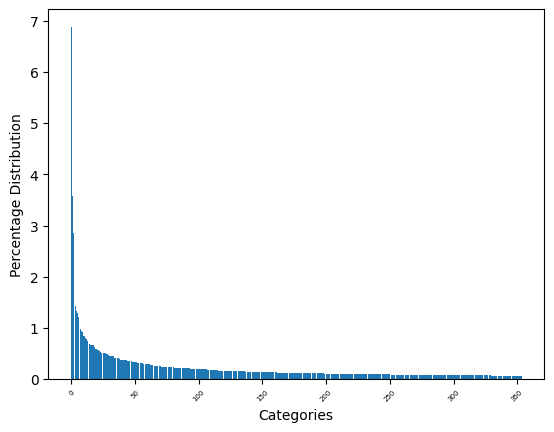

In [22]:
import matplotlib.pyplot as plt
plt.bar(range(354),(products['category_name'].value_counts(normalize=True).values[:354])*100, width=0.9)
plt.xticks(rotation = 45)
plt.xticks(fontsize=5)
plt.xlabel("Categories")
plt.ylabel("Percentage Distribution")

[Text(0, 0, '46103'),
 Text(0, 0, '5037'),
 Text(0, 0, '444'),
 Text(0, 0, '49'),
 Text(0, 0, '11'),
 Text(0, 0, '2')]

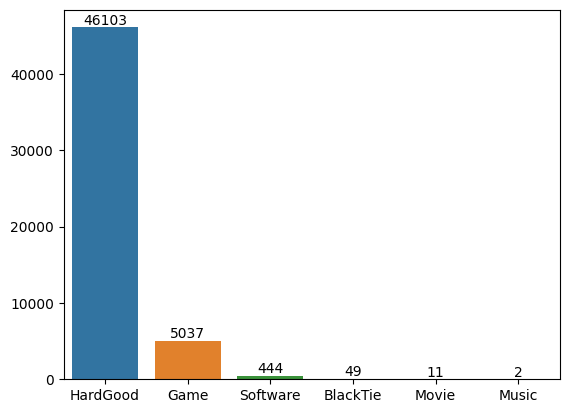

In [23]:
ax=sns.barplot(x=products['type'].value_counts(normalize=True).index,y=((products['type'].value_counts().values)))
ax.bar_label(ax.containers[0])

Checking the Data

In [24]:
cleaned_products=products.drop(columns=['sku','upc', 'manufacturer', 'model', 'url', 'image'])


In [25]:
cleaned_products['cat_list'][0]

['Connected Home & Housewares',
 'Housewares',
 'Household Batteries',
 'Alkaline Batteries']

In [26]:
cleaned_products['category'][0]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'},
 {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]

In [27]:
cleaned_products['category_name'][0]

'Alkaline Batteries'

In [28]:
cleaned_products.loc[41546]


name                                Catz - PRE-OWNED - Nintendo DS
type                                                          Game
price                                                         9.99
category         [{'id': 'abcat0700000', 'name': 'Video Games'}...
shipping                                                      3.99
description      Have your very own kitten right in the palm of...
category_id                                     pcmcat232900050017
category_name                                      Pre-Owned Games
cat_list                            [Video Games, Pre-Owned Games]
string_cat                            Video Games Pre-Owned Games 
Name: 41546, dtype: object

In [29]:
products.loc[51644]['name']

'Amazon - Fire TV Stick'

### Making the pipeline for preprocessing the data

In [30]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re
import unicodedata

### CLASSES FOR NAME

class RemoveSpecialChars(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def special(self,x):
        new=[]
        pattern = r'[^a-zA-Z\s]|\[|\]'
        y = re.sub(pattern, '', x)
        new.append(y)
        return new

    def transform(self, X):
        X_1=[]
        for x in X:
            X_1.append(self.special(x))
        return X_1

    

class RemoveExtraWhitespace(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_X=[]
        for x in X:
            for xx in x:
                    xx=' '.join([word for word in xx.split()])
                    new_X.append(xx)
            
                
        return new_X

class RemoveAccentedChars(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_X=[]
        for x in X:
            x = unicodedata.normalize('NFD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_X.append(x)
        return new_X

name_pipeline = Pipeline([
    ('Special removal', RemoveSpecialChars()),
    ('Spaces Removal', RemoveExtraWhitespace()),
    ('Accented Removal', RemoveAccentedChars())
])


class NumericalNanValuesImputation(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    """
    This function receives a dataframe with only numerical features
    and returns the same dataframe with all the NaN values imputated
    by the median

    Arguments:
        numerical_df: pd.DataFrame
    Returns:
        new_numerical_df: pd.DataFrame 
    """
    columns=X.columns
    c=X[columns].isna().sum()
    to_fill=[]
    for x,y in zip(c.values, c.index):
      if x != 0:
        to_fill.append(y)
    new_numerical_df=pd.DataFrame(index=X.index,
                                  columns=X.columns)
    for x in columns:
      if x in to_fill:
        median=X[x].median()
        new_numerical_df[x]=X[x].fillna(median)
      else:
        new_numerical_df[x]=X[x]
    return new_numerical_df

class ImputeOutliers(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    """
    This function receives a dataframe with only numerical features
    and returns the same dataframe with all the outlier values imputated
    by the median
    
    Arguments:
        X: pd.DataFrame
    Returns:
        X: pd.DataFrame 

    """
    for j in X.columns:
      Q3 = np.quantile(X[j], 0.75)
      Q1 = np.quantile(X[j], 0.25)
      IQR = Q3 - Q1
      lower_range = Q1 - 1.5 * IQR
      upper_range = Q3 + 1.5 * IQR
      median=X[j].median()

      new_serie=[]
      for x in X[j]:
        if (x > lower_range) & (x < upper_range):
          new_serie.append(x)
        else:
          new_serie.append(median)

      X[j]=new_serie
    return X

class StandardScaling(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    """
    This function receives a numerical dataframe and returns the same
    dataframe with the values scaled with StandardScaler()
    
    Arguments:
        numerical_df: pd.DataFrame
    Returns:
        numerical_df: pd.DataFrame 
    """
    standar_scaler = StandardScaler()
    for x in X.columns:
      arr=np.array(X[x]).reshape(-1,1)
      X[x]=standar_scaler.fit_transform(arr)

    return X


In [31]:
!pip install gensim


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\frodr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from gensim.models import Word2Vec, KeyedVectors, FastText, Doc2Vec

class Word2VecProcessor(TransformerMixin):
    def fit(self, X, y=None):
        model_w2v = Word2Vec(X, vector_size=100, workers=6, epochs=50, min_count=1)  
        model_w2v.save('w2vec_model.txt')
        
        return self

    def transform(self, X):
        model = Word2Vec.load('w2vec_model.txt')
        corpus_vectors=[]
        for element in X:
            main_vector=np.zeros([100,],)
            for word in element:
                sub_vector=model.wv[word]
                main_vector=main_vector+ sub_vector
            main_vector=main_vector/len(element)
            corpus_vectors.append(main_vector)
        return corpus_vectors

class FastTextProcessor(TransformerMixin):
    def fit(self, X, y=None):
        model_ft = FastText(X, vector_size=100, workers=6, epochs=50, min_count=1)  
        model_ft.save('fasttext_model.txt')
        
        return self

    def transform(self, X):
        model = FastText.load('fasttext_model.txt')
        corpus_vectors=[]
        for element in X:
            main_vector=np.zeros([100,],)
            for word in element:
                sub_vector=model.wv[word]
                main_vector=main_vector+ sub_vector
            main_vector=main_vector/len(element)
            corpus_vectors.append(main_vector)
        return corpus_vectors

name_pipeline = Pipeline([
    ('Special removal', RemoveSpecialChars()),
    ('Spaces Removal', RemoveExtraWhitespace()),
    ('Accented Removal', RemoveAccentedChars())#,
    #('Word 2 Vec', Word2VecProcessor())
])

len(Word2VecProcessor().fit_transform(cleaned_products['name'].fillna("")))

C:\Users\frodr\AppData\Local\Temp\ipykernel_39368\208741059.py:20: RuntimeWarning: invalid value encountered in divide
  main_vector=main_vector/len(element)


51646

In [42]:
#Testing the Pipeline
clean_names=name_pipeline.fit_transform(cleaned_products['name'].fillna(""))

clean_names

['Duracell AAA Batteries Pack',
 'Duracell AA V CopperTop Batteries Pack',
 'Duracell AA Batteries Pack',
 'Energizer MAX Batteries AA Pack',
 'Duracell C Batteries Pack',
 'Duracell D Batteries Pack',
 'Duracell V Batteries Pack',
 'Directed Electronics Viper Audio Glass Break Sensor',
 'Energizer N Cell E Batteries Pack',
 'Metra Radio Installation Dash Kit for Most Ford Lincoln Mercury Vehicles Black',
 'Metra Radio Dash Multikit for Select GM Vehicles Black',
 'Metra Wiring Harness for Select Ford Vehicles Multicolored',
 'Metra Turbo Wire Aftermarket Radio Wire Harness Adapter for Select Vehicles',
 'Metra Wiring Harness for Most Honda Acura Vehicles Multicolored',
 'METRA Antenna Cable Adapter Black',
 'INSTALL PORTABLE RADAR DETECTOR INST',
 'Jensen V NiCad Battery for MHz Phones',
 'Metra Radio Installation Dash Kit for Select Ford Mazda and Mercury Vehicles Pair Black',
 'Metra DIN Trim Ring for Most Vehicles',
 'Metra Turbowire Radio Harness Adapter for Select Jeep Vehicles',